In [1]:
import os
import copy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import numpy as np

from IPython.display import display_html

In [2]:
for dirpath, dirnames, filenames in os.walk('/home/elangaar/kaggle_courses'):
    for filename in filenames:
        print(os.path.join(dirpath, filename))

/home/elangaar/kaggle_courses/06. Exercise_ Renaming and Combining.ipynb
/home/elangaar/kaggle_courses/02. Indexing, Selecting & Assigning _ Kaggle.pdf
/home/elangaar/kaggle_courses/05. Exercise_ Data Types and Missing Values.ipynb
/home/elangaar/kaggle_courses/06. Renaming and Combining _ Kaggle.pdf
/home/elangaar/kaggle_courses/training.ipynb
/home/elangaar/kaggle_courses/04. Grouping and Sorting _ Kaggle.pdf
/home/elangaar/kaggle_courses/03. Exercise_ Summary Functions and Maps.ipynb
/home/elangaar/kaggle_courses/pandas_notes
/home/elangaar/kaggle_courses/learn_random_forest.ipynb
/home/elangaar/kaggle_courses/titanic.ipynb
/home/elangaar/kaggle_courses/python_course.py
/home/elangaar/kaggle_courses/cows_and_goats.csv
/home/elangaar/kaggle_courses/01. Exercise_ Creating, Reading and Writing.ipynb
/home/elangaar/kaggle_courses/getting-start-with-python.ipynb
/home/elangaar/kaggle_courses/intro_to_machine_learning.ipynb
/home/elangaar/kaggle_courses/02. Exercise_ Indexing, Selecting &

In [3]:
train_data = pd.read_csv('data/titanic_train.csv')
test_data = pd.read_csv('data/titanic_test.csv')

In [4]:
os.getcwd()

'/home/elangaar/kaggle_courses'

In [5]:
print(f'Train data shape: {train_data.shape}')
print(f'Test data shape: {test_data.shape}')

Train data shape: (891, 12)
Test data shape: (418, 11)


In [6]:
train_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
train_data.loc[train_data.Fare == 0, ['PassengerId']].count()

PassengerId    15
dtype: int64

In [10]:
train_data.loc[train_data.Age.isna()].count()

PassengerId    177
Survived       177
Pclass         177
Name           177
Sex            177
Age              0
SibSp          177
Parch          177
Ticket         177
Fare           177
Cabin           19
Embarked       177
dtype: int64

In [11]:
train_data.Survived.unique()

array([0, 1])

In [12]:
train_data.loc[train_data.SibSp == 4, ['PassengerId']].count()

PassengerId    18
dtype: int64

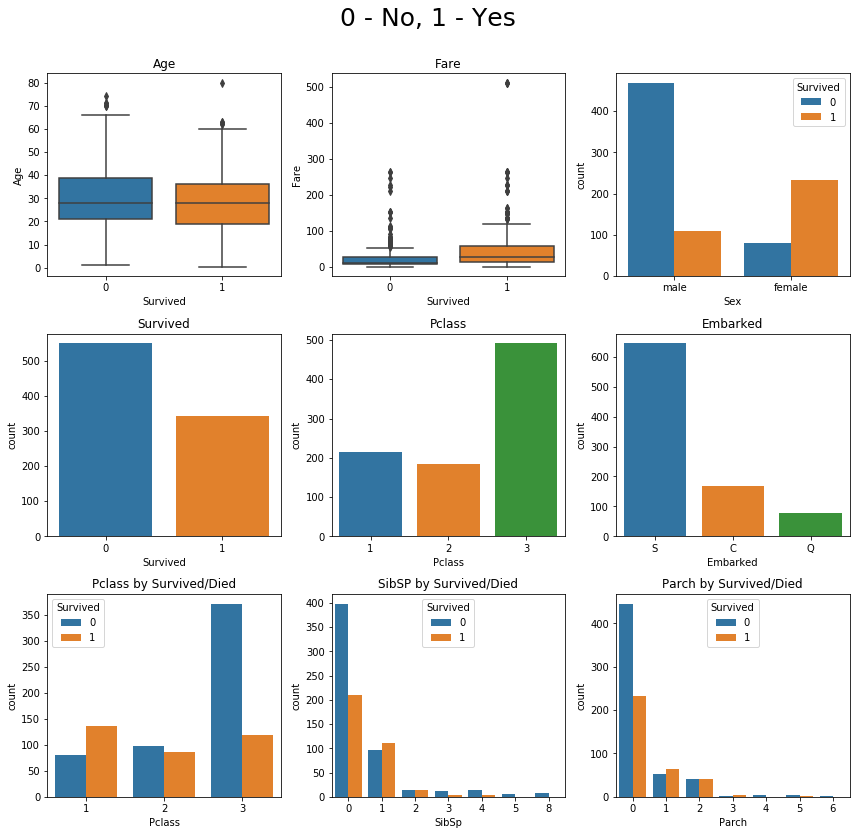

In [13]:
fig = plt.figure(figsize=(12, 11))
fig.suptitle("0 - No, 1 - Yes", fontsize=25, y=1.05)
plt.subplot2grid((3, 3), (0, 0))
sns.boxplot(x='Survived', y='Age', data=train_data, orient='v')
plt.title('Age')
plt.subplot2grid((3, 3), (0, 1))
sns.boxplot(x='Survived', y='Fare', data=train_data, orient='v')
plt.title('Fare')
plt.subplot2grid((3, 3), (0, 2))
sns.countplot(x='Sex', hue='Survived', data=train_data)
plt.subplot2grid((3, 3), (1, 0))
sns.countplot(x='Survived', data=train_data)
plt.title('Survived')
plt.subplot2grid((3, 3), (1, 1))
sns.countplot(x='Pclass', data=train_data)
plt.title('Pclass')
plt.subplot2grid((3, 3), (1, 2))
sns.countplot(x='Embarked', data=train_data)
plt.title('Embarked')
plt.subplot2grid((3, 3), (2, 0))
sns.countplot(x='Pclass', hue='Survived', data=train_data)
plt.title('Pclass by Survived/Died')
plt.subplot2grid((3, 3), (2, 1))
sns.countplot(x='SibSp', hue='Survived', data=train_data)
plt.title('SibSP by Survived/Died')
plt.subplot2grid((3, 3), (2, 2))
sns.countplot(x='Parch', hue='Survived', data=train_data)
plt.title('Parch by Survived/Died')

plt.tight_layout()

### Pre-processing data

In [14]:
survived_train = train_data.Survived
data = train_data.drop('Survived', axis=1).append(test_data, sort=False)

In [15]:
data.Cabin = data.Cabin.str[0]

In [16]:
data.Cabin = data.Cabin.fillna('noCabin')

###### Check how many Age values are estimated

In [17]:
(data.Age % 1 != 0).sum()

308

In [18]:
data.Sex = data.Sex.replace('female', 0)
data.Sex = data.Sex.replace('male', 1)
data.Sex= data.Sex.astype(int)

In [19]:
data['FamilySize'] = data.SibSp + data.Parch + 1

In [20]:
data['IsSolo'] = 0
data.loc[data.FamilySize == 1, 'IsSolo'] = 1
data['SmallGroup'] = 0
data.loc[data.FamilySize.isin([2, 3, 4]), 'SmallGroup'] = 1

In [21]:
data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsSolo,SmallGroup
0,1,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,noCabin,S,2,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C,C,2,0,1
2,3,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,noCabin,S,1,1,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C,S,2,0,1
4,5,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,noCabin,S,1,1,0


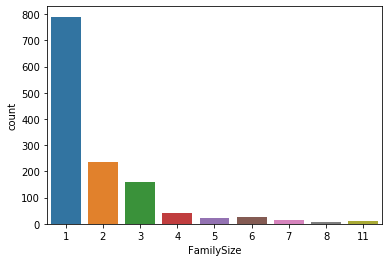

In [22]:
sns.countplot(data['FamilySize'])

In [23]:
data.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            263
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin            0
Embarked         2
FamilySize       0
IsSolo           0
SmallGroup       0
dtype: int64

In [24]:
data['Title'] = data['Name'].str.replace('(.*, )|(\. .*)', '')

In [25]:
data.Title = data.Title.replace(['Mme', 'Ms', 'Lady', 'Mlle', 'the Countess', 'Dona'], 'lady')

In [26]:
data.Title = data.Title.replace(['Don', 'Major', 'Sir', 'Col', 'Capt', 'Jonkheer'], 'other')

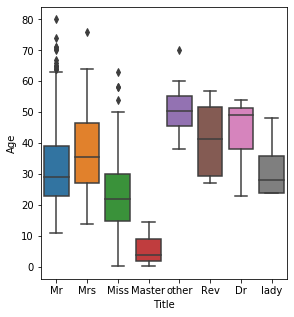

In [27]:
plt.figure(figsize=(15, 5))
plt.subplot2grid((1, 3), (0, 0))
sns.boxplot(x='Title', y='Age', data=data)

In [28]:
data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsSolo,SmallGroup,Title
0,1,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,noCabin,S,2,0,1,Mr
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C,C,2,0,1,Mrs
2,3,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,noCabin,S,1,1,0,Miss
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C,S,2,0,1,Mrs
4,5,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,noCabin,S,1,1,0,Mr


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 15 columns):
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null int64
Age            1046 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          1309 non-null object
Embarked       1307 non-null object
FamilySize     1309 non-null int64
IsSolo         1309 non-null int64
SmallGroup     1309 non-null int64
Title          1309 non-null object
dtypes: float64(2), int64(8), object(5)
memory usage: 203.6+ KB


In [30]:
for title in data.Title.unique().tolist():
    data.loc[data.Title == title, ['Age']] = data.loc[data.Title == title, ['Age']].fillna(data.loc[data.Title == title, ['Age']].mean())

In [31]:
tickets = set(data.Ticket)
ticket_numbers = []
fares = []

for ticket in tickets:
    ticket_numbers.append(len(data[data.Ticket == ticket]))
    fares.append(data['Fare'][data.Ticket == ticket].mean())

In [32]:
tickets_sum = pd.DataFrame()
tickets_sum['Ticket'] = list(tickets)
tickets_sum['Count'] = ticket_numbers
tickets_sum['Fare'] = fares
tickets_sum['FarePP'] = tickets_sum['Fare']/tickets_sum['Count']
tickets_sum = tickets_sum.drop(['Count', 'Fare'], axis=1)

data = pd.merge(data, tickets_sum, 'left', 'Ticket')

In [33]:
data.FarePP = data.FarePP.fillna(data.FarePP.median())

In [34]:
data.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin          0
Embarked       2
FamilySize     0
IsSolo         0
SmallGroup     0
Title          0
FarePP         0
dtype: int64

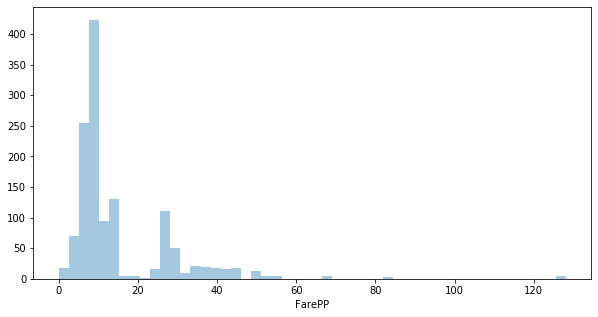

In [35]:
plt.figure(figsize=(10, 5))
sns.distplot(a=data.FarePP, kde=False)

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 1308
Data columns (total 16 columns):
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null int64
Age            1309 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          1309 non-null object
Embarked       1307 non-null object
FamilySize     1309 non-null int64
IsSolo         1309 non-null int64
SmallGroup     1309 non-null int64
Title          1309 non-null object
FarePP         1309 non-null float64
dtypes: float64(3), int64(8), object(5)
memory usage: 173.9+ KB


In [37]:
data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsSolo,SmallGroup,Title,FarePP
0,1,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,noCabin,S,2,0,1,Mr,7.25000
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C,C,2,0,1,Mrs,35.64165
2,3,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,noCabin,S,1,1,0,Miss,7.92500
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C,S,2,0,1,Mrs,26.55000
4,5,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,noCabin,S,1,1,0,Mr,8.05000


## Feature selection

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
feats = ['PassengerId', 'Sex', 'Pclass', 'SibSp', 'Parch', 'FarePP', 'IsSolo', 'SmallGroup', 'FamilySize', 'Title']

In [40]:
data.loc[:890,].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 16 columns):
PassengerId    891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null int64
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          891 non-null object
Embarked       889 non-null object
FamilySize     891 non-null int64
IsSolo         891 non-null int64
SmallGroup     891 non-null int64
Title          891 non-null object
FarePP         891 non-null float64
dtypes: float64(3), int64(8), object(5)
memory usage: 118.3+ KB


In [41]:
df = copy.copy(data)

In [42]:
orig_feats = ['PassengerId', 'SibSp', 'Parch', 'FarePP', 'FamilySize']
dummy_feats = ['Sex', 'Pclass', 'IsSolo', 'SmallGroup', 'Title']

In [43]:
orig_df = df.loc[:, orig_feats]

In [44]:
dummy_df = pd.get_dummies(df.loc[:, dummy_feats])

In [45]:
print(f'orig_df shape:\t{orig_df.shape}')
print(f'dummy_df shape:\t{dummy_df.shape}')

orig_df shape:	(1309, 5)
dummy_df shape:	(1309, 12)


In [46]:
conc_df = pd.concat([orig_df, dummy_df], axis=1)

In [47]:
conc_df.head()

,PassengerId,SibSp,Parch,FarePP,FamilySize,Sex,Pclass,IsSolo,SmallGroup,Title_Dr,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rev,Title_lady,Title_other
0,1,1,0,7.25000,2,1,3,0,1,0,0,0,1,0,0,0,0
1,2,1,0,35.64165,2,0,1,0,1,0,0,0,0,1,0,0,0
2,3,0,0,7.92500,1,0,3,1,0,0,0,1,0,0,0,0,0
3,4,1,0,26.55000,2,0,1,0,1,0,0,0,0,1,0,0,0
4,5,0,0,8.05000,1,1,3,1,0,0,0,0,1,0,0,0,0


In [48]:
conc_df.loc[885:895, ]

,PassengerId,SibSp,Parch,FarePP,FamilySize,Sex,Pclass,IsSolo,SmallGroup,Title_Dr,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rev,Title_lady,Title_other
885,886,0,5,4.854167,6,0,3,0,0,0,0,0,0,1,0,0,0
886,887,0,0,13.000000,1,1,2,1,0,0,0,0,0,0,1,0,0
887,888,0,0,30.000000,1,0,1,1,0,0,0,1,0,0,0,0,0
888,889,1,2,5.862500,4,0,3,0,1,0,0,1,0,0,0,0,0
889,890,0,0,30.000000,1,1,1,1,0,0,0,0,1,0,0,0,0
890,891,0,0,7.750000,1,1,3,1,0,0,0,0,1,0,0,0,0
891,892,0,0,7.829200,1,1,3,1,0,0,0,0,1,0,0,0,0
892,893,1,0,7.000000,2,0,3,0,1,0,0,0,0,1,0,0,0
893,894,0,0,9.687500,1,1,2,1,0,0,0,0,1,0,0,0,0
894,895,0,0,8.662500,1,1,3,1,0,0,0,0,1,0,0,0,0


In [49]:
X = conc_df.loc[:890,]

In [50]:
y = survived_train

In [51]:
test_x = conc_df.loc[891:, ]

In [52]:
X.shape

(891, 17)

In [53]:
test_x.shape

(418, 17)

In [54]:
print(f'X shape:\t{X.shape}')
print(f'y len:\t\t{len(y)}')
print(f'test_x shape:\t{test_x.shape}')

X shape:	(891, 17)
y len:		891
test_x shape:	(418, 17)


In [55]:
train_x, val_x, train_y, val_y = train_test_split(X, y, random_state=0)

In [56]:
print(f'train_x.shape:\t{train_x.shape}')
print(f'train_y.shape:\t{train_y.shape}')
print(f'test_x.shape:\t{val_x.shape}')

train_x.shape:	(668, 17)
train_y.shape:	(668,)
test_x.shape:	(223, 17)


## Modeling

In [57]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, confusion_matrix, roc_curve
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [58]:
def get_measures(y, pred_y):
    score_test = roc_auc_score(y, pred_y)
    gini_index = 2*score_test-1
    
    df = pd.DataFrame({'AUC': [round(score_test, 4)], 'Gini': [round(gini_index, 4)]})
    return df

def calculating_metrics(model, test_x, val_x, test_y, val_y):
    test = get_measures(test_y, model.predict_proba(test_x)[:, 1])
    val = get_measures(val_y, model.predict_proba(val_x)[:, 1])
    
    return pd.concat([test, val]).set_index([pd.Index(['TRAIN', 'VAL'])])
    

### DecisionTreeClassifier

In [59]:
grid_param = {
    'max_depth': np.linspace(1, 15, 15),
    'min_samples_split': np.linspace(0.01, 1, 10),
    'min_samples_leaf': np.linspace(0.01, 0.5, 5),
    'max_features': list(range(1, train_x.shape[1])),
    
}

In [60]:
random_param = {
    'max_depth': np.linspace(2, 20, 20),
    
}

In [61]:
model_DTC = DecisionTreeClassifier(random_state=1)

In [62]:
grid = GridSearchCV(model_DTC, grid_param, scoring='roc_auc')
grid.fit(train_x, train_y)
best_parameters_DTC_grid = grid.best_params_
print(best_parameters_DTC_grid)

{'max_depth': 5.0, 'max_features': 4, 'min_samples_leaf': 0.01, 'min_samples_split': 0.12}


In [63]:
model_GS = DecisionTreeClassifier(**best_parameters_DTC_grid, random_state=1)
model_GS.fit(train_x, train_y)
cm_DTC_GS = calculating_metrics(model_GS, train_x, val_x, train_y, val_y)
cm_DTC_GS

,AUC,Gini
TRAIN,0.8753,0.7506
VAL,0.8459,0.6918


In [64]:
c_matrix_dtc_gs = confusion_matrix(val_y, model_GS.predict(val_x))
c_matrix_dtc_gs

array([[115,  24],
       [ 20,  64]])

In [65]:
def perf_measure(y, y_pred):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(y_pred)): 
        if y[i]==y_pred[i] and y_pred[i]==1:
           TP += 1
        if y_pred[i]==1 and y[i]!=y_pred[i]:
           FP += 1
        if y[i]==y_pred[i] and y_pred[i]==0:
           TN += 1
        if y_pred[i]==0 and y[i]!=y_pred[i]:
           FN += 1

    return(TP, FP, TN, FN)

In [66]:
real_y = val_y.to_numpy(dtype=int)

In [67]:
predict_y = model_GS.predict(val_x)

In [68]:
basic_measures = perf_measure(real_y, predict_y)
print(f'TP:\t{basic_measures[0]}\nFP:\t{basic_measures[1]}\nTN:\t{basic_measures[2]}\nFN:\t{basic_measures[3]}')

TP:	64
FP:	24
TN:	115
FN:	20


In [69]:
TN = c_matrix_dtc_gs[0][0]
FN = c_matrix_dtc_gs[1][0]
TP = c_matrix_dtc_gs[1][1]
FP = c_matrix_dtc_gs[0][1]

In [70]:
def get_indicators(real_y, predict_y):
    TP, FP, TN, FN = perf_measure(real_y, predict_y)
    

    pos = TP + FN
    neg = TN + FP

    tpr = TP / (TP + FN)
    tnr = TN / (TN + FP)
    fpr = FP / (FP + TN)
    fnr = FN / (FN + TP)

    acc = (TP + TN) / (TP + TN + FP + FN)

    msg = (f'Number of positive observations:\t\t{pos}\n'
           f'Number of negative observations:\t\t{neg}\n'
           f'Total number of observations:\t\t\t{pos+neg}\n\n'
           f'TPR (True Positive Rate), SE (sensitivity):\t{tpr:.4f}\n'
           f'TNR (True Negative Rate), SPC (specificity):\t{tnr:.4f}\n'
           f'FPR (False Positive Rate):\t\t\t{fpr:.4f}\n'
           f'FNR (False Negative Rate):\t\t\t{fnr:.4f}\n'
           f'ACC (Total Accuracy):\t\t\t\t{acc:.4f}'
          )
    return msg

In [71]:
print(get_indicators(real_y, predict_y))

Number of positive observations:		84
Number of negative observations:		139
Total number of observations:			223

TPR (True Positive Rate), SE (sensitivity):	0.7619
TNR (True Negative Rate), SPC (specificity):	0.8273
FPR (False Positive Rate):			0.1727
FNR (False Negative Rate):			0.2381
ACC (Total Accuracy):				0.8027


In [72]:
model_GS.fit(train_x, train_y)
b = (model_GS.predict_proba(val_x)[:, 1] >=0.4).astype(int)

In [73]:
for t in np.linspace(0.1, 1, 10):
    print(f'{t:.1f}\t\t{(model_GS.predict_proba(val_x)[:, 1] > t).sum()}')

    

0.1		199
0.2		106
0.3		106
0.4		88
0.5		88
0.6		88
0.7		46
0.8		46
0.9		46
1.0		0


In [74]:
pred_prob = model_GS.predict_proba(val_x)[:, 1]
fpr_dtc_gs, tpr_dtc_gs, th = roc_curve(val_y, pred_prob)
auc_dts_gs = roc_auc_score(val_y, pred_prob)

AUC: 0.8459


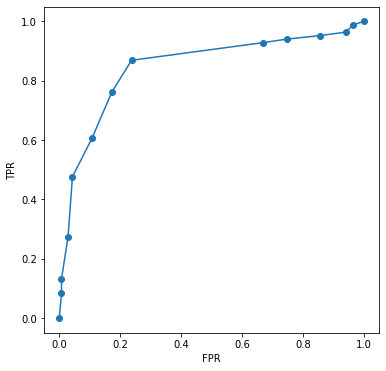

In [75]:
plt.figure(figsize=(6, 6))
plt.plot(fpr_dtc_gs, tpr_dtc_gs, 'o-')
plt.ylabel('TPR')
plt.xlabel('FPR')
print(f'AUC: {auc_dts_gs:.4f}')

In [76]:
random_search = RandomizedSearchCV(model_DTC, grid_param, n_iter=200, scoring='roc_auc')
random_search.fit(train_x, train_y)
best_parameters_DTC_random = random_search.best_params_
print(best_parameters_DTC_random)

{'min_samples_split': 0.23, 'min_samples_leaf': 0.1325, 'max_features': 14, 'max_depth': 11.0}


In [77]:
model_RS = DecisionTreeClassifier(**best_parameters_DTC_random, random_state=1)
model_RS.fit(train_x, train_y)
cm_DTC_RS = calculating_metrics(model_RS, train_x, val_x, train_y, val_y)
cm_DTC_RS

,AUC,Gini
TRAIN,0.8525,0.7049
VAL,0.8391,0.6782


In [78]:
from hyperopt import hp, STATUS_OK, Trials, fmin, tpe, partial

In [79]:
n_startup_jobs = 80
max_evals = 500
BS_results = []

In [80]:
b_opt_space = {
    'max_depth': hp.quniform('max_depth', 1, 15, 1),
    'min_samples_split': hp.uniform('min_samples_split', 0.01, 1),
    'min_samples_leaf': hp.uniform('min_samples_leaf', 0.01, 0.5),
    'max_features': hp.quniform('max_features', 1, train_x.shape[1], 1)
}

In [81]:
def objective(space):
    b_params = {
        'max_depth': int(space['max_depth']),
        'min_samples_split': space['min_samples_split'],
        'min_samples_leaf': space['min_samples_leaf'],
        'max_features': int(space['max_features'])
    }
    model = DecisionTreeClassifier(**b_params, random_state=0)
    model.fit(train_x, train_y)
    pred_y = model.predict(val_x)
    
    score = -roc_auc_score(val_y, pred_y)
    return {'loss': score, 'status': STATUS_OK}

In [82]:
trials = Trials()
best_parameters_DTC_bayesian = fmin(fn=objective,
                   space=b_opt_space, 
                   algo=partial(tpe.suggest, n_startup_jobs=n_startup_jobs),
                   max_evals=max_evals,
                   trials=trials
                  )
print(f'best params: {best_parameters_DTC_bayesian}')

100%|██████████| 500/500 [00:19<00:00, 25.22trial/s, best loss: -0.8354316546762591]
best params: {'max_depth': 9.0, 'max_features': 15.0, 'min_samples_leaf': 0.022261557105642836, 'min_samples_split': 0.010857583155608107}


In [83]:
best_parameters_DTC_bayesian['max_features'] = int(best_parameters_DTC_bayesian['max_features'])

In [84]:
model_BO = DecisionTreeClassifier(**best_parameters_DTC_bayesian, random_state=1)
model_BO.fit(train_x, train_y)
cm_DTC_BO = calculating_metrics(model_BO, train_x, val_x, train_y, val_y)
cm_DTC_BO

,AUC,Gini
TRAIN,0.9086,0.8171
VAL,0.8397,0.6793


In [85]:
cm_DTC_GS_styler = cm_DTC_GS.style.set_table_attributes("style='display:inline'").set_caption('GridSearchCV')
cm_DTC_RS_styler = cm_DTC_RS.style.set_table_attributes("style='display:inline'").set_caption('RandomSearchCV')
cm_DTC_BO_styler = cm_DTC_BO.style.set_table_attributes("style='display:inline'").set_caption('Bayesian Optimization')

In [86]:
display_html(cm_DTC_GS_styler._repr_html_()+cm_DTC_RS_styler._repr_html_()+cm_DTC_BO_styler._repr_html_(), raw=True)

,AUC,Gini
TRAIN,0.8753,0.7506
VAL,0.8459,0.6918
,AUC,Gini
TRAIN,0.8525,0.7049
VAL,0.8391,0.6782
,AUC,Gini
TRAIN,0.9086,0.8171
VAL,0.8397,0.6793


In [87]:
results_DTC = pd.concat([cm_DTC_GS, cm_DTC_RS, cm_DTC_BO],
                        axis=1,
                        keys={'GidSearchCV': cm_DTC_GS,
                              'RandomSearchCV': cm_DTC_RS,
                              'Bayesian Optimization': cm_DTC_BO}
                       )
results_DTC

GidSearchCV         RandomSearchCV         Bayesian Optimization        
              AUC    Gini            AUC    Gini                   AUC    Gini
TRAIN      0.8753  0.7506         0.8525  0.7049                0.9086  0.8171
VAL        0.8459  0.6918         0.8391  0.6782                0.8397  0.6793

### RandomForestClassifier

In [88]:
grid_param_RFC = {
    'n_estimators': [200, 250, 300],
#     'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [20, None],
    'min_samples_split': [5, 10, 12],
    'min_samples_leaf': [2, 3, 4, 5]
}

In [89]:
model_RFC = RandomForestClassifier(random_state=1)

In [90]:
grid_RFC_GS = GridSearchCV(model_RFC, grid_param_RFC, scoring='roc_auc')
grid_RFC_GS.fit(train_x, train_y)
best_parameters_RFC_grid = grid_RFC_GS.best_params_
print(best_parameters_RFC_grid)

{'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 12, 'n_estimators': 250}


In [91]:
model_RFC_GS = RandomForestClassifier(**best_parameters_RFC_grid, random_state=1)
model_RFC_GS.fit(train_x, train_y)
cm_RFC_GS = calculating_metrics(model_RFC_GS, train_x, val_x, train_y, val_y)
cm_RFC_GS

,AUC,Gini
TRAIN,0.9445,0.8889
VAL,0.8845,0.7691


In [92]:
random_RFC_RS = RandomizedSearchCV(model_RFC, grid_param_RFC, scoring='roc_auc')
random_RFC_RS.fit(train_x, train_y)
best_parameters_RFC_random = random_RFC_RS.best_params_
print(best_parameters_RFC_random)

{'n_estimators': 250, 'min_samples_split': 12, 'min_samples_leaf': 3, 'max_depth': None}


In [93]:
model_RFC_RS = RandomForestClassifier(**best_parameters_RFC_random, random_state=1)
model_RFC_RS.fit(train_x, train_y)
cm_RFC_RS = calculating_metrics(model_RFC_RS, train_x, val_x, train_y, val_y)
cm_RFC_RS

,AUC,Gini
TRAIN,0.9508,0.9017
VAL,0.8846,0.7693


### hyperopt

In [94]:
b_opt_space = {
    'n_estimators': hp.quniform('n_estimators', 200, 300, 50),
    'max_depth': hp.quniform('max_depth', 10, 30, 2),
    'min_samples_split': hp.quniform('min_samples_split', 4, 116, 2),
    'min_samples_leaf': hp.quniform('min_samples_leaf', 2, 8, 2)
}

In [95]:
def objective(space):
    b_opt_space = {
        'n_estimators': int(space['n_estimators']),
        'max_depth': int(space['max_depth']),
        'min_samples_split': int(space['min_samples_split']),
        'min_samples_leaf': int(space['min_samples_leaf']),
    }
    model = RandomForestClassifier(**b_opt_space, random_state=0)
    model.fit(train_x, train_y)
    pred_y = model.predict(val_x)
    score = -roc_auc_score(val_y, pred_y)
    return {'loss': score, 'status': STATUS_OK}

In [96]:
trials = Trials()
best_parameters_RFC_bayesian = fmin(fn=objective,
                                    space=b_opt_space,
                                    algo=partial(tpe.suggest, n_startup_jobs=n_startup_jobs),
                                    max_evals=max_evals,
                                    trials=trials
                                   )
print(f'best params: {best_parameters_RFC_bayesian}')

100%|██████████| 500/500 [04:12<00:00,  1.98trial/s, best loss: -0.8340613223706749]
best params: {'max_depth': 16.0, 'min_samples_leaf': 2.0, 'min_samples_split': 4.0, 'n_estimators': 250.0}


In [97]:
best_parameters_RFC_bayesian['n_estimators'] = int(best_parameters_RFC_bayesian['n_estimators'])
best_parameters_RFC_bayesian['max_depth'] = int(best_parameters_RFC_bayesian['max_depth'])
best_parameters_RFC_bayesian['min_samples_split'] = int(best_parameters_RFC_bayesian['min_samples_split'])
best_parameters_RFC_bayesian['min_samples_leaf'] = int(best_parameters_RFC_bayesian['min_samples_leaf'])

In [98]:
model_RFC_BO = RandomForestClassifier(**best_parameters_RFC_bayesian, random_state=0)
model_RFC_BO.fit(train_x, train_y)
cm_RFC_BO = calculating_metrics(model_RFC_BO, train_x, val_x, train_y, val_y)
cm_RFC_BO

,AUC,Gini
TRAIN,0.9792,0.9583
VAL,0.8923,0.7847


In [99]:
results_RFC = pd.concat([cm_RFC_GS, cm_RFC_RS, cm_RFC_BO],
                        axis=1,
                        keys={'GidSearchCV': cm_RFC_GS,
                              'RandomSearchCV': cm_RFC_RS,
                              'Bayesian Optimization': cm_RFC_BO}
                       )
results_RFC

GidSearchCV         RandomSearchCV         Bayesian Optimization        
              AUC    Gini            AUC    Gini                   AUC    Gini
TRAIN      0.9445  0.8889         0.9508  0.9017                0.9792  0.9583
VAL        0.8845  0.7691         0.8846  0.7693                0.8923  0.7847

## Submission

In [100]:
subm = pd.read_csv('data/gender_submission.csv')

In [101]:
pred_values = model_RFC_BO.predict(test_x)

In [102]:
subm_values = pd.Series(pred_values, name='Survived', index=range(len(pred_values)))

In [103]:
subm.Survived = subm_values

In [104]:
subm.to_csv('data/gender_submission.csv', index=False)